## Text similarity

In [65]:
import re
import numpy as np
import scipy.spatial as spat
from functools import reduce 

with open('sentences.txt', 'r') as f:
    text = f.read()

def string_to_words(line):
    words = re.sub(r'[^a-z]', ' ', line.lower()).split()
    return words
    
words_matrix = list(map(string_to_words, text.split('\n')))
unique_words = reduce(lambda a, x: set.union(set(a), set(x)), words_matrix)

# for line in words_matrix:
#     for word in line:
#         if word in unique_words:
#             print(word)

words_indices = list(range(len(unique_words)))
words_indices_dic = dict(zip(unique_words, words_indices))

n = len(words_matrix)      # sentences count
d = len(words_indices_dic) # unique words count

words_occurences = np.zeros((n,d))
for sentence_index in range(len(words_matrix)):
    for word, word_index in words_indices_dic.items():
        words_occurences[sentence_index][word_index] += words_matrix[sentence_index].count(word)
        
distances = list(map(lambda x: spat.distance.cosine(x, words_occurences[0]), words_occurences))
sorted_indices = np.array(distances).argsort()

with open('submission-1.txt', 'w') as f:
    f.write(str(sorted_indices[1]) + ' ' + str(sorted_indices[2]))

## Function approximation

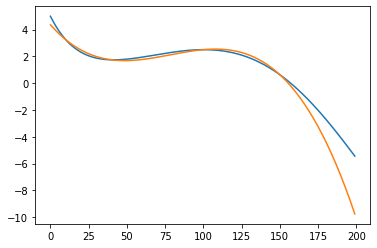

In [51]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import linalg

def f(x):
    return math.sin(x / 5) * math.exp(x / 10) + 5 * math.exp(-x / 2)

def build_polynom(coefs):
    def to_return(x):
        result = 0;
        for i in range(len(coefs)):
            result += coefs[i] * (x ** i)
        
        return result
            
    return to_return

p = np.array([1, 4, 10, 15])
n = p.size
a = np.ones((n, n))
for i in range(n):
    a[:,i] = p ** i
    
b = np.array([f(xi) for xi in p])

w = linalg.solve(a, b)
polynom = build_polynom(w)

range_ = np.arange(0,20, 0.1)
origin = np.array([f(x) for x in range_])
interpolation = np.array([polynom(x) for x in range_])

plt.plot(origin)
plt.plot(interpolation)

with open('submission-2.txt', 'w') as f:
    f.write(' '.join(str(round(wi, 2)) for wi in w))